In [17]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
# import cv2
from PIL import Image

In [18]:
n_colors = 64

# Load the Summer Palace photo
image_path = "static/uploads/16504.jpg"
image = Image.open(image_path)
image = np.array(image)
print(image.shape)

(3500, 5250, 3)


In [19]:
image = np.array(image, dtype=np.float64) / 255

In [20]:
w, h, d = original_shape = tuple(image.shape)
image_array = np.reshape(image, (w * h, 3))

In [21]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.846s.


In [26]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (k-means)
done in 1.043s.


In [22]:
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (random)
done in 1.146s.


In [23]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

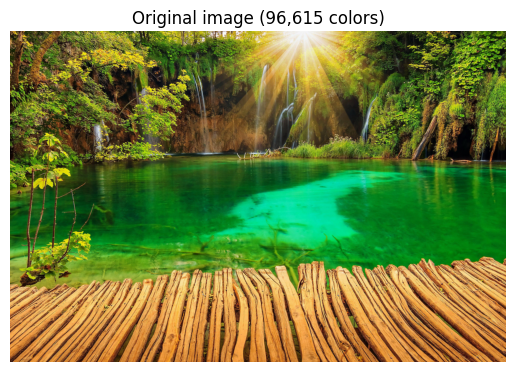

In [24]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(image)

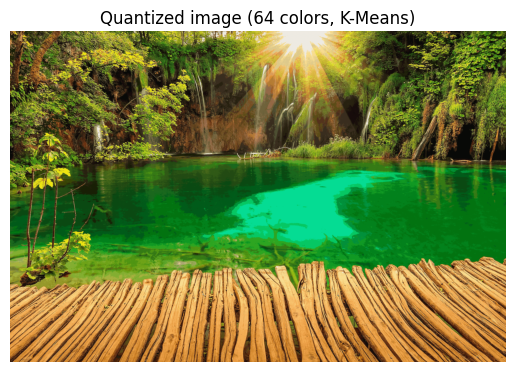

In [27]:

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))